In [88]:
###importation des libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [90]:
##### 1- preparation des donnees
# Définir les noms des colonnes
columns = [
    'Unit_Number', 
    'Time_in_Cycles', 
    'Operational_Setting_1', 
    'Operational_Setting_2', 
    'Operational_Setting_3'
] + [f'Sensor_Measurement_{i}' for i in range(1, 22)]

# Charger les données et attribuer les noms de colonnes
file_pathtrain = "C:/Users/workstation/Desktop/TP data mining/CMAPSSData/train_FD001.txt"  # chemin de train
datatrain = pd.read_csv(file_pathtrain, sep="\\s+", header=None)
file_pathtrain = "C:/Users/workstation/Desktop/TP data mining/CMAPSSData/test_FD001.txt"  #  chemin de test
datatest = pd.read_csv(file_pathtrain, sep="\\s+", header=None)
file_pathRUL = "C:/Users/workstation/Desktop/TP data mining/CMAPSSData/RUL_FD001.txt"  #  chemin de RUL 
dataRUL = pd.read_csv(file_pathtrain, sep="\\s+", header=None)
#datatest = pd.read_csv('CMAPSSData/test_FD001.txt', sep="\s+", header=None)
print(datatrain.columns)


# Renommer les colonnes
datatrain.columns = columns
datatest.columns = columns
dataRUL.columns = columns
#datatest.columns = columns


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='int64')


In [92]:
# Aperçu des données renommées
print(datatrain.head())
print(datatrain.columns)
print(datatrain.describe) ###statistiques descriptive
missing = datatrain.isnull().sum()
print(missing)


   Unit_Number  Time_in_Cycles  Operational_Setting_1  Operational_Setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   Operational_Setting_3  Sensor_Measurement_1  Sensor_Measurement_2  \
0                  100.0                518.67                641.82   
1                  100.0                518.67                642.15   
2                  100.0                518.67                642.35   
3                  100.0                518.67                642.35   
4                  100.0                518.67                642.37   

   Sensor_Measurement_3  Sensor_Measurement_4  Sensor_Measurement_5  ...  \
0         

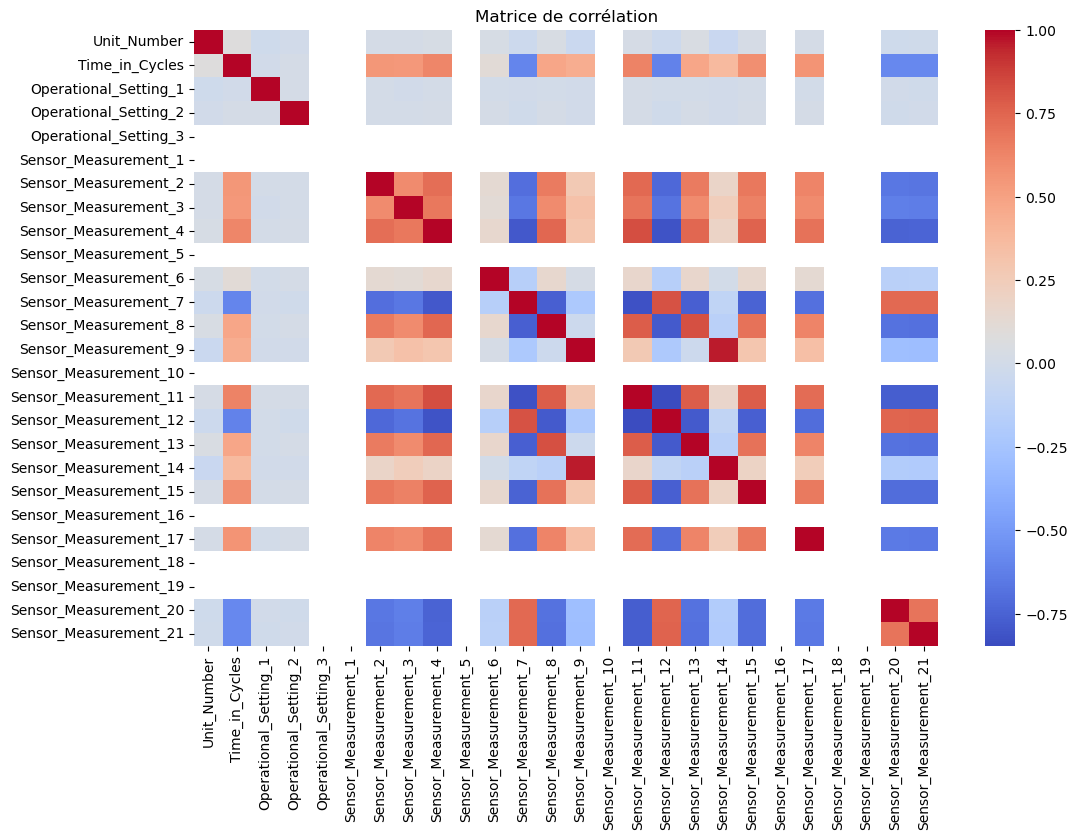

In [94]:
correlation = datatrain.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=False, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


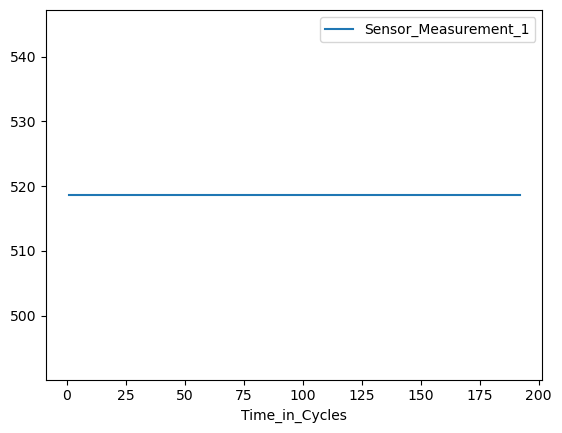

In [96]:
#Visualisation temporelle
datatrain[datatrain['Unit_Number'] == 1].plot(x='Time_in_Cycles', y='Sensor_Measurement_1')
plt.show()


In [98]:
#normaliser les donnees
scaler = MinMaxScaler()
datatrain_scaled = pd.DataFrame(scaler.fit_transform(datatrain.iloc[:, 2:]), columns=datatrain.columns[2:])
datatrain.head()


,Unit_Number,Time_in_Cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_Measurement_1,Sensor_Measurement_2,Sensor_Measurement_3,Sensor_Measurement_4,Sensor_Measurement_5,...,Sensor_Measurement_12,Sensor_Measurement_13,Sensor_Measurement_14,Sensor_Measurement_15,Sensor_Measurement_16,Sensor_Measurement_17,Sensor_Measurement_18,Sensor_Measurement_19,Sensor_Measurement_20,Sensor_Measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [100]:
datatrain['RUL'] = datatrain.groupby('Unit_Number')['Time_in_Cycles'].transform(max) - datatrain['Time_in_Cycles']
datatrain.head()


C:\Users\workstation\AppData\Local\Temp\ipykernel_2812\325937810.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  datatrain['RUL'] = datatrain.groupby('Unit_Number')['Time_in_Cycles'].transform(max) - datatrain['Time_in_Cycles']


,Unit_Number,Time_in_Cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_Measurement_1,Sensor_Measurement_2,Sensor_Measurement_3,Sensor_Measurement_4,Sensor_Measurement_5,...,Sensor_Measurement_13,Sensor_Measurement_14,Sensor_Measurement_15,Sensor_Measurement_16,Sensor_Measurement_17,Sensor_Measurement_18,Sensor_Measurement_19,Sensor_Measurement_20,Sensor_Measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


MAE: 13.361037072934336


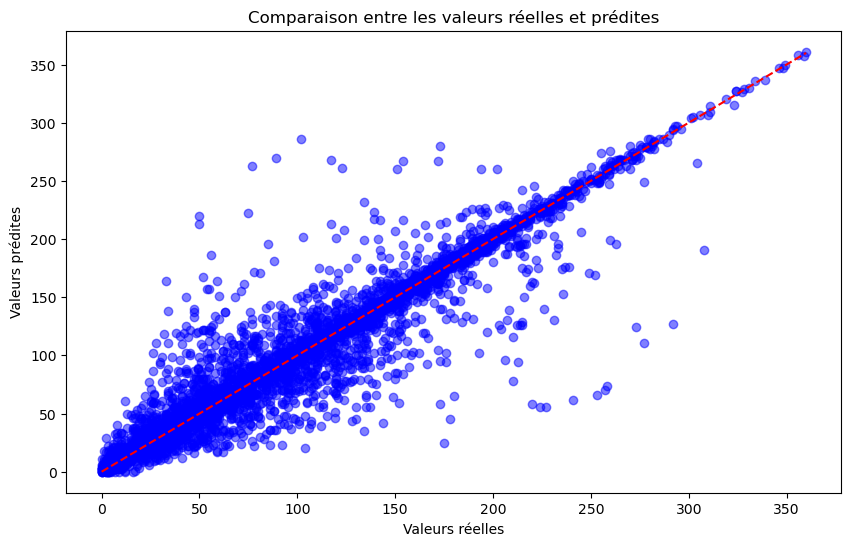

In [102]:
from sklearn.tree import DecisionTreeRegressor

# Créer un modèle de régression
decision_tree = DecisionTreeRegressor(random_state=42)

# Entraîner le modèle
decision_tree.fit(X_train, y_train)

# Prédictions
y_pred = decision_tree.predict(X_test)

# Calcul du MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
# Afficher le graphique de comparaison entre les valeurs réelles et prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Point de correspondance entre réel et prédit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne de parfaite correspondance
plt.title('Comparaison entre les valeurs réelles et prédites')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

Mean Absolute Error (MAE): 11.014846135207174


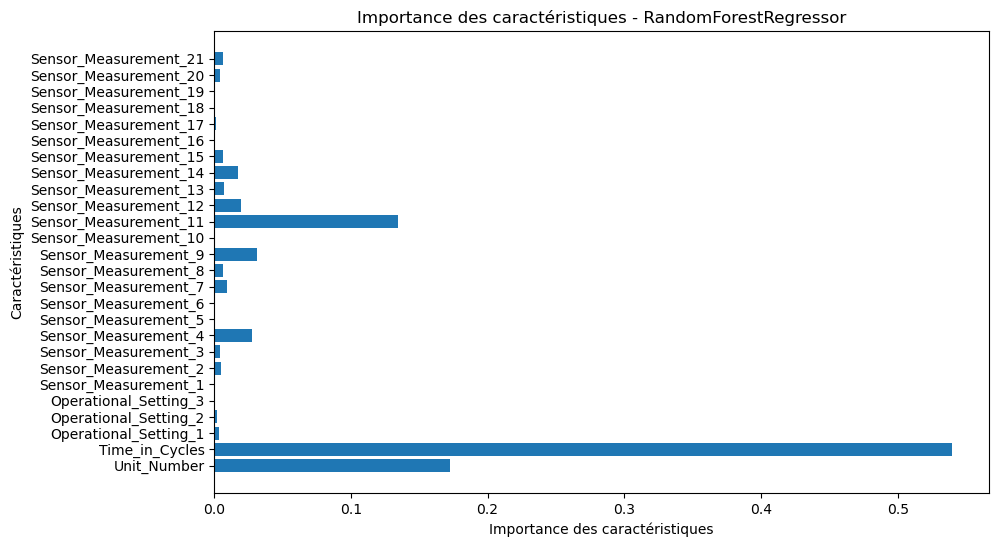

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# datatrain' est notre dataframe
X = datatrain.drop(columns=['RUL'])  # X contient toutes les colonnes sauf 'RUL'
y = datatrain['RUL']  # y contient la cible 'RUL'

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez et entraînez un modèle RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Faites des prédictions
y_pred = model.predict(X_test)

# Évaluez la performance du modèle avec l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Importance des caractéristiques
importances = model.feature_importances_

# Visualisation des caractéristiques importantes 
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importance des caractéristiques')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques - RandomForestRegressor')
plt.show()


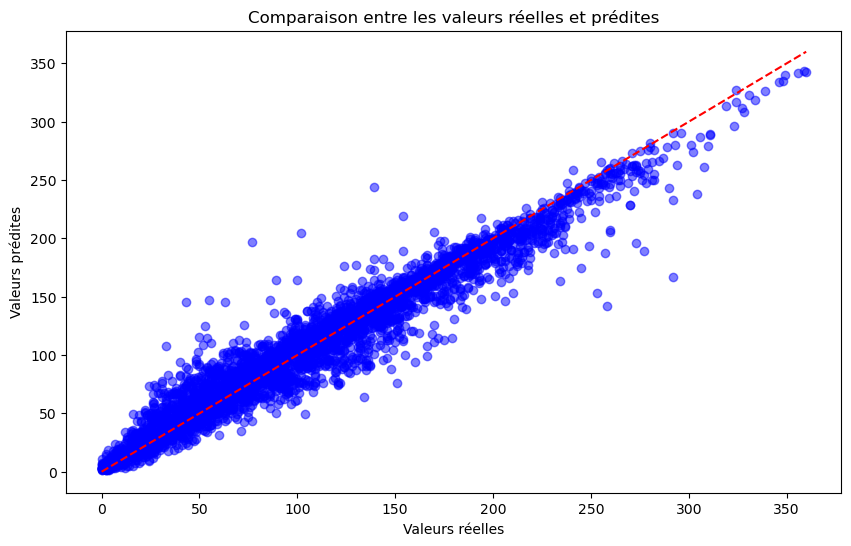

In [108]:
# Afficher le graphique de comparaison entre les valeurs réelles et prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Point de correspondance entre réel et prédit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne de parfaite correspondance
plt.title('Comparaison entre les valeurs réelles et prédites')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

MAE (KNN): 19.663581293918103


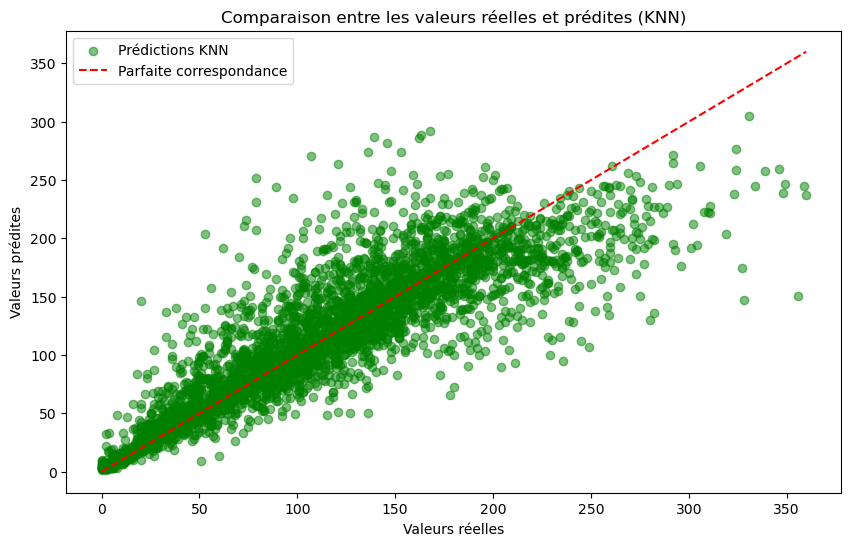

In [110]:
#calcul du KNN
from sklearn.neighbors import KNeighborsRegressor

# Entraînez un modèle KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Testez et évaluez
y_pred_knn = knn.predict(X_test)
print(f"MAE (KNN): {mean_absolute_error(y_test, y_pred_knn)}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.5, label='Prédictions KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Parfaite correspondance')
plt.title('Comparaison entre les valeurs réelles et prédites (KNN)')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()

MAE (Decision Tree): 13.361037072934336


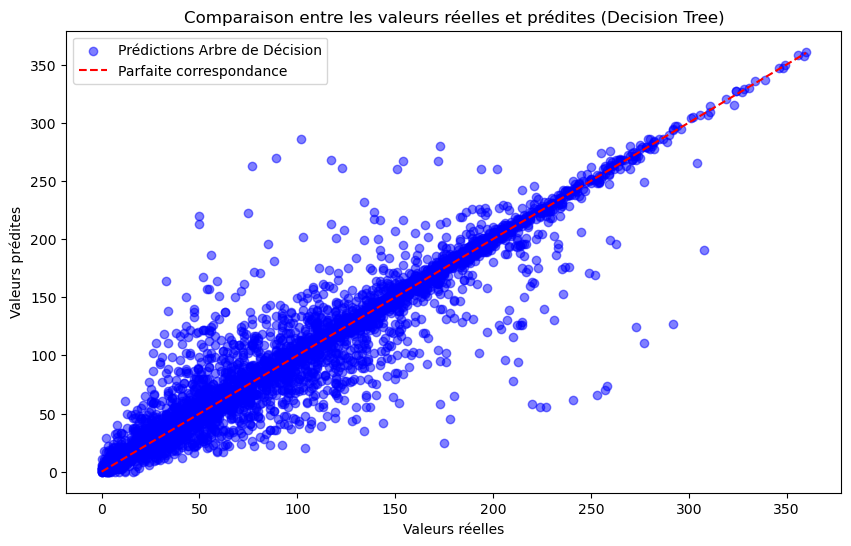

In [112]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"MAE (Decision Tree): {mean_absolute_error(y_test, y_pred_dt)}")
# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5, label='Prédictions Arbre de Décision')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Parfaite correspondance')
plt.title('Comparaison entre les valeurs réelles et prédites (Decision Tree)')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()


MAE (AdaBoost): 7.846619820692998


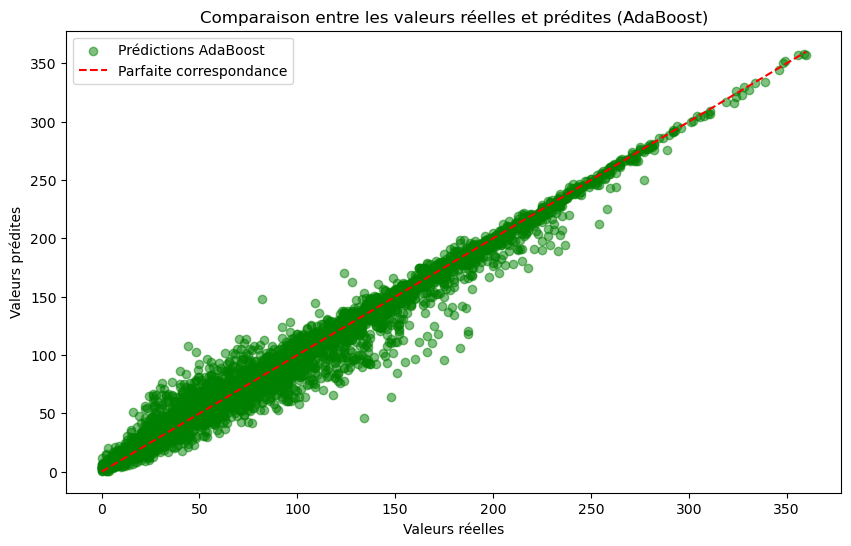

In [114]:
#calcul Adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialisez l'AdaBoostRegressor
ab = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Entraînez le modèle
ab.fit(X_train, y_train)

# Faites des prédictions
y_pred_ab = ab.predict(X_test)

# Affichez les résultats
print(f"MAE (AdaBoost): {mean_absolute_error(y_test, y_pred_ab)}")
# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ab, color='green', alpha=0.5, label='Prédictions AdaBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Parfaite correspondance')
plt.title('Comparaison entre les valeurs réelles et prédites (AdaBoost)')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()


MAE (Bagging): 10.967850739035619


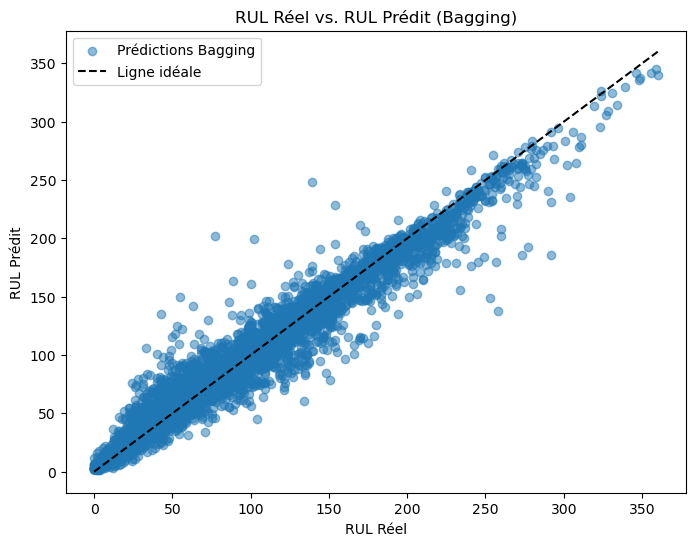

In [116]:
#calcul decision tree
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialisez le BaggingRegressor
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Entraînez le modèle
bagging.fit(X_train, y_train)

# Faites des prédictions
y_pred_bagging = bagging.predict(X_test)

# Affichez les résultats
print(f"MAE (Bagging): {mean_absolute_error(y_test, y_pred_bagging)}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bagging, alpha=0.5, label='Prédictions Bagging')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ligne idéale')
plt.xlabel('RUL Réel')
plt.ylabel('RUL Prédit')
plt.title('RUL Réel vs. RUL Prédit (Bagging)')
plt.legend()
plt.show()

In [118]:
#calcul du K means
from sklearn.cluster import KMeans

# Ajustez KMeans sur les données complètes
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(datatrain_scaled)

# Ajouter les clusters aux données complètes
datatrain['Cluster'] = kmeans.labels_
print(datatrain['Cluster'].value_counts())

Cluster
0    5078
1    4351
3    4273
2    3612
4    3317
Name: count, dtype: int64


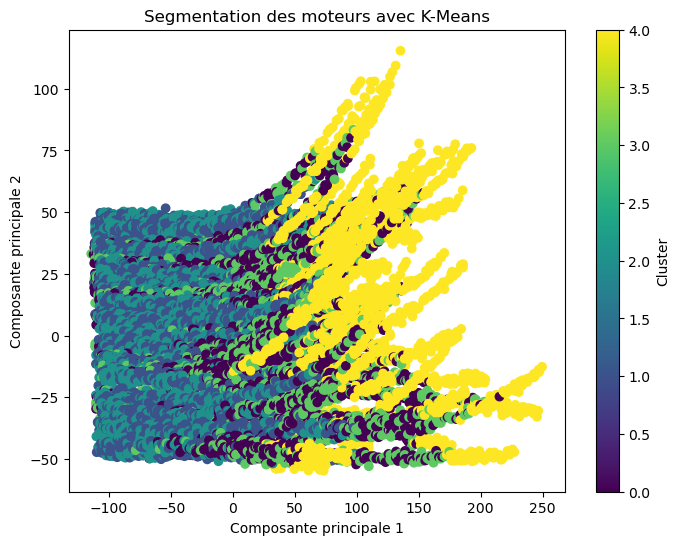

In [120]:
from sklearn.decomposition import PCA

# Réduction de dimension pour la visualisation
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Affichage des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Segmentation des moteurs avec K-Means')
plt.colorbar(label='Cluster')
plt.show()


In [122]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Définir un seuil pour transformer les données en format binaire
threshold = 10  # Exemple : capteurs avec valeurs supérieures à 10
binary_data = (datatrain.iloc[:, 5:] > threshold).astype(bool)  # Conversion en type booléen

# Trouver les itemsets fréquents avec l'algorithme Apriori
frequent_itemsets = apriori(binary_data, min_support=0.1, use_colnames=True, low_memory=True)

# Afficher les itemsets fréquents
print("Itemsets fréquents :")
print(frequent_itemsets)

# Générer les règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Afficher les règles générées
print("\nRègles d'association :")
print(rules)


Itemsets fréquents :
         support                                           itemsets
0       1.000000                             (Sensor_Measurement_1)
1       1.000000                             (Sensor_Measurement_2)
2       1.000000                             (Sensor_Measurement_3)
3       1.000000                             (Sensor_Measurement_4)
4       1.000000                             (Sensor_Measurement_5)
...          ...                                                ...
524282  0.946682  (RUL, Sensor_Measurement_5, Sensor_Measurement...
524283  0.946682  (RUL, Sensor_Measurement_5, Sensor_Measurement...
524284  0.946682  (RUL, Sensor_Measurement_5, Sensor_Measurement...
524285  0.946682  (RUL, Sensor_Measurement_5, Sensor_Measurement...
524286  0.946682  (Sensor_Measurement_12, RUL, Sensor_Measuremen...

[524287 rows x 2 columns]


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
#utilisation de PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Choisir le nombre de dimensions
X_reduced = pca.fit_transform(X_train)
print(f"Variance expliquée : {sum(pca.explained_variance_ratio_):.2f}")
